### 데이터 로드
---

In [10]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from sklearn.model_selection import train_test_split

In [5]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/naver_shopping.txt", filename="naver_shopping.txt")

('naver_shopping.txt', <http.client.HTTPMessage at 0x139800350>)

In [11]:
total_data = pd.read_table('naver_shopping.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 199989


In [8]:
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,f보여요;; 저렴한맛에 그냥 씁니다
2,2,별루 ㅏㅛㅇ치ㅗ티ㅓ치ㅗ탛캏타ㅗ티ㅗ티ㅗ티ㅛ티ㅛ티ㅗㅗㅗ치ㅕ치ㅕ쳐ㅣ처ㅣ치ㅓ처ㅣ펴ㅣ쳐ㅣ치ㅕ...
3,5,촉감도 좋고 무게감이나 핏도 편합니다
4,5,불멍하기좋고 사이즈도 너무 좋아요


In [9]:
total_data['ratings'].value_counts()

ratings
5    81174
2    63982
1    36047
4    18786
Name: count, dtype: int64

In [12]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,f보여요;; 저렴한맛에 그냥 씁니다,0
2,2,별루 ㅏㅛㅇ치ㅗ티ㅓ치ㅗ탛캏타ㅗ티ㅗ티ㅗ티ㅛ티ㅛ티ㅗㅗㅗ치ㅕ치ㅕ쳐ㅣ처ㅣ치ㅓ처ㅣ펴ㅣ쳐ㅣ치ㅕ...,0
3,5,촉감도 좋고 무게감이나 핏도 편합니다,1
4,5,불멍하기좋고 사이즈도 너무 좋아요,1
...,...,...,...
199984,2,장마라그런가!!! 달지않아요,0
199985,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199986,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199987,5,넘이쁘고 쎄련되보이네요~,1


#### np.select() 사용 방법

In [18]:
import pandas as pd

# 예시 데이터 프레임 생성
data = {'국어': {'가': 86, '나': 79, '다': 93, '라': 80}, 
        '영어': {'가': 90, '나': 10, '다': 50, '라': 95}}
df = pd.DataFrame(data)

cond1 = df['국어'] >= 80
cond2 = df['영어'] >= 80

np.where(cond1 & cond2, '수', np.where(cond1 | cond2, '우', '미'))

df['학생평가'] = np.select([cond1 & cond2, cond1 | cond2], ['수', '우'], '미')

df

,국어,영어,학생평가
가,86,90,수
나,79,10,미
다,93,50,우
라,80,95,수


### 중복 확인(reviews) 및 중복 제거
---

In [23]:
len(total_data), total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique(), 

(199989, 4, 199897, 2)

In [24]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print(f'총 샘플의 수 : {len(total_data)}')

총 샘플의 수 : 199897


### Null 확인

In [27]:
total_data.isnull().values.any()

np.False_

In [28]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199897 entries, 0 to 199988
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  199897 non-null  int64 
 1   reviews  199897 non-null  object
 2   label    199897 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [31]:
total_data.describe()

,ratings,label
count,199897.000000,199897.000000
mean,3.225936,0.500008
std,1.645438,0.500001
min,1.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


### 훈련 데이터와 테스트 데이터를 3:1 비율로 분리

In [13]:
train_data, test_data = train_test_split(total_data, test_size=0.25, random_state = 42)
print(f'total_data 리뷰의 개수: {len(total_data)}')
print(f'훈련용 리뷰의 개수: {len(train_data)}')
print(f'테스트용 리뷰의 개수: {len(test_data)}')
print(f'훈련용 + 테스트용  리뷰의 개수: {len(train_data) + len(test_data)}')


total_data 리뷰의 개수: 199989
훈련용 리뷰의 개수: 149991
테스트용 리뷰의 개수: 49998
훈련용 + 테스트용  리뷰의 개수: 199989


In [34]:
train_data.head()

,ratings,reviews,label
60906,5,원래 먹이던 사료에요,1
104255,5,재구매 커피 아주 맛있급니다 맨날 씨키꼬잇너뇨,1
185343,1,흘러서 박스가 다 젖은 채로 왔어요.. 교환하려다가 그냥 먹습니다.,0
106327,5,잘 받았습니다. 아직 사용 전인데 잘 되었으면 좋겠네요..,1
90459,4,가볍고 길어 좋아요,1


<Axes: xlabel='label'>

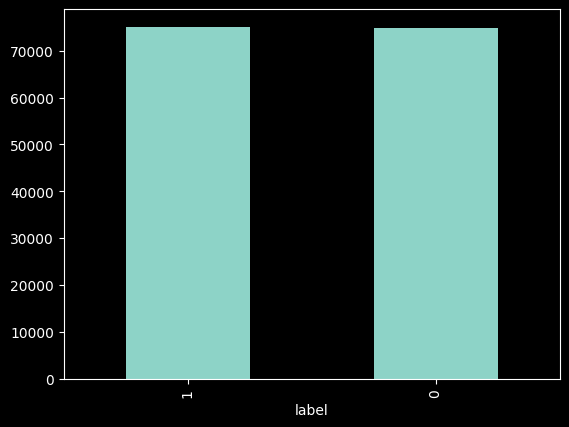

In [14]:
train_data['label'].value_counts().plot(kind='bar')

In [40]:
print(train_data.groupby('label').size().reset_index(name='count'))

   label  count
0      0  74915
1      1  75007


### Huggingface.co 에서 모델 찾고 예제 실행
---

In [15]:
from transformers import pipeline
classifier = pipeline("text-classification", model="matthewburke/korean_sentiment")
custom_tweet = "영화 재밌다."

preds = classifier(custom_tweet, return_all_scores=True)
# preds = classifier(custom_tweet, top_k=None)

is_positive = preds[0][1]['score'] > 0.5

print(f"스코어 점수 확인 : {preds[0][1]['score']}")
print(f"긍정 여부 : {is_positive}")


Device set to use mps:0


스코어 점수 확인 : 0.9731518626213074
긍정 여부 : True


/opt/anaconda3/envs/fc_fine_tune/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


### GPU 테스트
---

In [16]:
import torch

def check_mps_availability():
    # MPS 사용 가능 여부를 확인합니다.
    if torch.backends.mps.is_available():
        print("이 장치에서 MPS(GPU 가속)를 사용할 수 있습니다.")
    else:
        print("MPS를 사용할 수 없습니다. CPU를 사용합니다.")

#  GPU 사용 가능 여부를 확인합니다.
check_mps_availability()

이 장치에서 MPS(GPU 가속)를 사용할 수 있습니다.


In [17]:
test_data.head()

,ratings,reviews,label
129081,4,무생채도 나쁘지않아요~ 좀 단맛이 강하긴해도 많이 안맵고 좋아요,1
175075,2,생각보다 얇고 방어는 안될거 같아요. 빨면 주름져서 회사다니면서는 못쓰고 주말에 집...,0
182259,2,품절이라 입고 늦어서 빨리 못받았어요,0
141850,5,맛있어요 저렴해요!!ㅎㅎ,1
67774,5,다 죽일거야 보기만해도 혐오스러운 바퀴벌레 어후 ㅜㅜ 쓰고 나서 많이 없어졌어요 먹...,1


In [18]:
def pred_sentiment(text):
  preds = classifier(text, return_all_scores=True)
  if preds[0][1]['score'] > 0.5:
    return 1
  else:
    return 0

In [19]:
pred_sentiment('피부에 뾰루지가 많이 올라와요')

/opt/anaconda3/envs/fc_fine_tune/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


0

In [20]:
from tqdm import tqdm
tqdm.pandas()

In [21]:
# 테스트 데이터 중 상위 1,000개만 복사
test_data_for_sample = test_data[:1000].copy()

In [22]:
test_data_for_sample['pred'] = test_data_for_sample['reviews'].progress_apply(pred_sentiment)

  0%|          | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/envs/fc_fine_tune/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
100%|██████████| 1000/1000 [00:32<00:00, 30.67it/s]


In [23]:
test_data_for_sample.head()

,ratings,reviews,label,pred
129081,4,무생채도 나쁘지않아요~ 좀 단맛이 강하긴해도 많이 안맵고 좋아요,1,1
175075,2,생각보다 얇고 방어는 안될거 같아요. 빨면 주름져서 회사다니면서는 못쓰고 주말에 집...,0,0
182259,2,품절이라 입고 늦어서 빨리 못받았어요,0,0
141850,5,맛있어요 저렴해요!!ㅎㅎ,1,1
67774,5,다 죽일거야 보기만해도 혐오스러운 바퀴벌레 어후 ㅜㅜ 쓰고 나서 많이 없어졌어요 먹...,1,1


In [24]:
# 정확도 계산 함수
def compute_accuracy(df):
    correct = (df['pred'] == df['label']).sum()
    total = len(df)
    return correct / total

In [25]:
acc = compute_accuracy(test_data_for_sample)
print('정확도(%):', acc * 100)

정확도(%): 89.5
